## Accommodation Finder


### permanent Accommodation

In [186]:
#load permanent Accommodation csv File to data frame
import pandas as pd
from IPython.core.display import HTML
permanentAccomodationData = pd.read_csv('PermanentAccommodation.csv')
padf = pd.DataFrame(permanentAccomodationData)

padf.head()

location           address  rent  \
0      Calumet Street, Mission Hill, Boston, MA       Mission Hill  $512   
1                        73 Park Drive, MA 02215        Park Drive   NaN   
2        75 St Alphonsus Street Boston,MA 02120   Alphonsus Street  $570   
3                                            NaN               NaN  $550   
4  92 Algonquin Rd, Chestnut Hill, MA 02467, USA     Chestnut Hill  $600   

  roomtype gender  vacancy  bed  bath apartment_type              start  \
0   SHARED   GIRL      1.0  3.0   1.0           GIRL  December 31, 2022   
1   SHARED   GIRL      1.0  1.0   1.0           GIRL    January 1, 2023   
2   SHARED    BOY      2.0  2.0   1.5           GIRL    January 1, 2023   
3   SHARED   GIRL      2.0  3.0   2.0          MIXED  December 28, 2022   
4  PRIVATE   GIRL      1.0  5.0   1.5            NaN   December 1, 2022   

                 end  spot          name      contact  \
0   January 23, 2023  room          Neha  16172384663   
1   January 31, 2023  hall        Shikha  16092556159   
2   January 23, 2023  hall       Akilesh  18573951538   
3  December 28, 2023  room     Manaswini  18573816342   
4    August 23, 2023  room  Ketan Chugni  18573767895   

                                         description  
0  - Safe location around NEU\n\n🚘Accessible by R...  
1  - Total 3 GIRLs including you\n- It’s a 1 Bed ...  
2  Total 6 people including you.\n\n2BHK- 1.5 Bat...  
3  -Huge closet available\n-Attached Balcony\n-To...  
4  Features of the apartment:\n- Hot water includ...

In [187]:
# permanent accommodation dataframe info
padf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        48 non-null     object 
 1   address         48 non-null     object 
 2   rent            44 non-null     object 
 3   roomtype        60 non-null     object 
 4   gender          60 non-null     object 
 5   vacancy         57 non-null     float64
 6   bed             59 non-null     float64
 7   bath            59 non-null     float64
 8   apartment_type  56 non-null     object 
 9   start           60 non-null     object 
 10  end             60 non-null     object 
 11  spot            59 non-null     object 
 12  name            57 non-null     object 
 13  contact         60 non-null     object 
 14  description     32 non-null     object 
dtypes: float64(3), object(12)
memory usage: 7.2+ KB


In [188]:
# permanent accommodation dataframe shape
padf.shape

(60, 15)

In [189]:
# clean contact data data

padf["contact"] = padf["contact"].str.replace("(", "", regex=True)
padf["contact"] = padf["contact"].str.replace(")", "", regex=True)
padf["contact"] = padf["contact"].str.replace("-", "", regex=True)
padf["contact"] = padf["contact"].str.replace(" ", "", regex=True)
padf['contact'] = padf['contact'].astype('int')

In [190]:
# clean rent

padf['rent'] = padf['rent'].str.strip('$')
padf['rent'] = padf['rent'].str.replace(',','')
padf['rent'] = padf['rent'].astype('float')
padf['rent'].fillna(value=int(round(padf['rent'].mean())), inplace=True)

In [191]:
# fill NaN values with mean and respective values

padf['apartment_type'].fillna(value='MIXED', inplace=True)
padf['vacancy'].fillna(value=1, inplace=True)
padf['gender'] = padf['gender'].str.replace('both', 'BOTH')
display(HTML(padf.to_html()))

In [192]:
# change start and end accommdation to pandas datetime
padf['start'] = pd.to_datetime(padf['start'], format="%B %d, %Y")
padf['end'] = pd.to_datetime(padf['end'], format="%B %d, %Y")

In [193]:
# after cleaning

padf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   location        48 non-null     object        
 1   address         48 non-null     object        
 2   rent            60 non-null     float64       
 3   roomtype        60 non-null     object        
 4   gender          60 non-null     object        
 5   vacancy         60 non-null     float64       
 6   bed             59 non-null     float64       
 7   bath            59 non-null     float64       
 8   apartment_type  60 non-null     object        
 9   start           60 non-null     datetime64[ns]
 10  end             60 non-null     datetime64[ns]
 11  spot            59 non-null     object        
 12  name            57 non-null     object        
 13  contact         60 non-null     int64         
 14  description     32 non-null     object        
dtypes: datet

### Temporary Accommodation

In [194]:
#load permanent Accommodation csv File to data frame
import pandas as pd
from IPython.core.display import HTML
tempAccomodationData = pd.read_csv('TemporaryAccomodation.csv')
tadf = pd.DataFrame(tempAccomodationData)

tadf.head()

address    locality  rent  \
0                               1203 BOYlston Street    Boylston  30.0   
1                             13 tabor pl Brookline   Brookline   20.0   
2                  1575 Tremont Street, The Longwood     Tremont  20.0   
3  J Vue Apartments, 75 St Alphonsus Street, Bost...     Tremont  20.0   
4                                  Downtown Crossing    Downtown  25.0   

               start               end gender        name          number  \
0  December 31, 2022  January 23, 2023   GIRL      Kimaya     18578698800   
1  December 27, 2022  January 13, 2023    BOY  Hemanthhhh  (857) 390-5572   
2  December 11, 2022  January 14, 2023   GIRL       Prats      9967202113   
3  December 20, 2022  January 20, 2023    NaN     Dhairya      8574379033   
4   December 6, 2022  January 20, 2023    BOY         NaN      9654350202   

   vacancy     spot                                        description  
0      1.0   SHARED  - Beautiful view of the MGM theatre and Fenway...  
1      2.0  PRIVATE                                                NaN  
2      1.0  PRIVATE                                                NaN  
3      1.0  PRIVATE                                                NaN  
4      1.0  PRIVATE  Friendly, Hygienic, Spacious Hall Space(Hosted...

In [195]:
# temporary accommodation dataframe info
tadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   address      51 non-null     object 
 1   locality     51 non-null     object 
 2   rent         32 non-null     float64
 3   start        51 non-null     object 
 4   end          51 non-null     object 
 5   gender       34 non-null     object 
 6   name         46 non-null     object 
 7   number       51 non-null     object 
 8   vacancy      46 non-null     float64
 9   spot         46 non-null     object 
 10  description  14 non-null     object 
dtypes: float64(2), object(9)
memory usage: 4.5+ KB


In [196]:
# permanent accommodation dataframe shape
tadf.shape

(51, 11)

In [197]:
# clean contact data data

tadf["number"] = tadf["number"].str.replace("(", "", regex=True)
tadf["number"] = tadf["number"].str.replace(")", "", regex=True)
tadf["number"] = tadf["number"].str.replace("-", "", regex=True)
tadf["number"] = tadf["number"].str.replace(" ", "", regex=True)
tadf['number'] = tadf['number'].astype('int')

In [198]:
# fill NaN values 
tadf['gender'].fillna(value='BOTH', inplace=True)
tadf['description'].fillna(value='', inplace=True)
tadf['spot'].fillna(value='SHARED', inplace=True)
tadf['name'].fillna(value='', inplace=True)

In [199]:
# change start and end accommdation to pandas datetime
tadf['start'] = pd.to_datetime(tadf['start'], format="%B %d, %Y")
tadf['end'] = pd.to_datetime(tadf['end'], format="%B %d, %Y")

In [200]:
# clean rent

tadf['rent'].fillna(value=float((tadf['rent'].mean())), inplace=True)

In [201]:
tadf['locality'] = tadf['locality'].str.replace('BOYlston', 'Boylston')

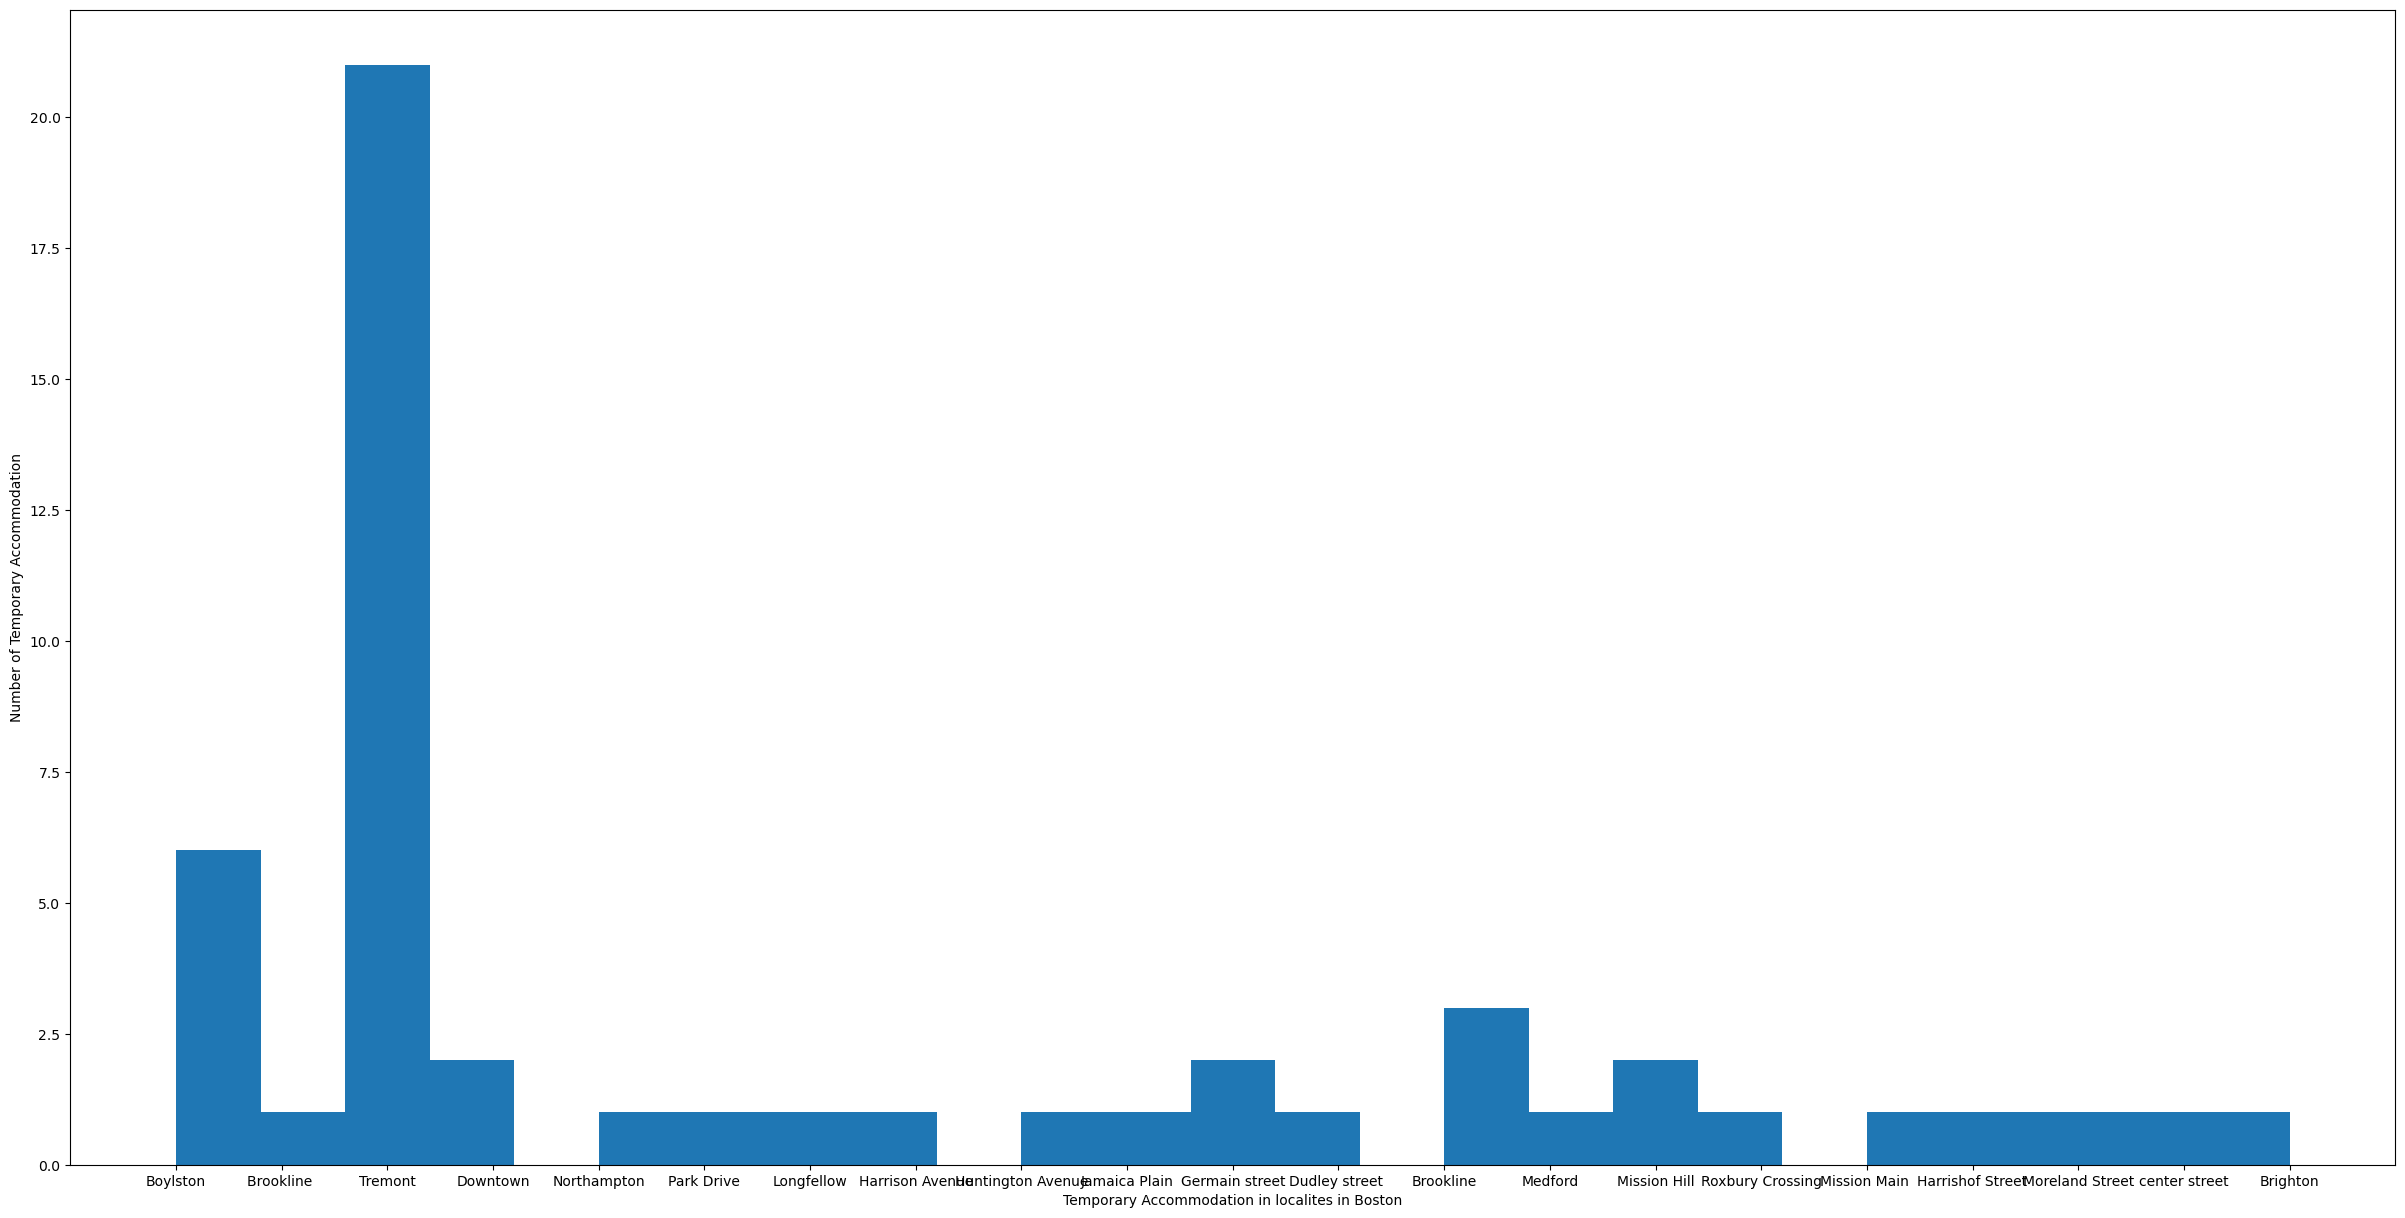

In [202]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [30.0, 15]
plt.hist(tadf['locality'], bins = 25)
plt.yscale('linear')

plt.xlabel('Temporary Accommodation in localites in Boston')
plt.ylabel('Number of Temporary Accommodation')


plt.show()

In [203]:
tadf['gender'] = tadf['gender'].str.replace('GIRLs', 'GIRL')

Text(0.5, 0, 'Temporary Accommodation availability based on spot type')

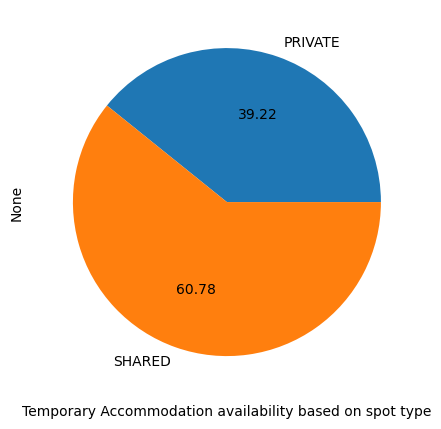

In [204]:
plt.rcParams["figure.figsize"] = [10, 5]
tadf.groupby('spot').size().plot(kind='pie', autopct='%.2f')
plt.xlabel("Temporary Accommodation availability based on spot type")

Text(0.5, 0, 'Temporary Accommodation availability based on gender')

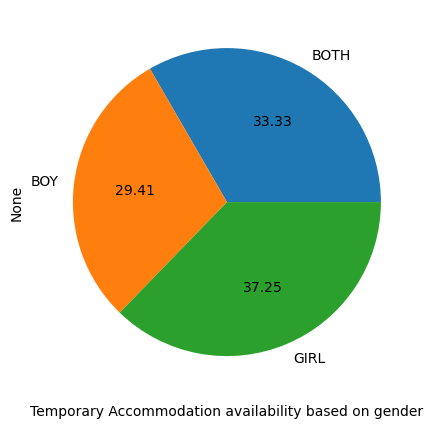

In [205]:
tadf.groupby('gender').size().plot(kind='pie', autopct='%.2f')
plt.xlabel("Temporary Accommodation availability based on gender")

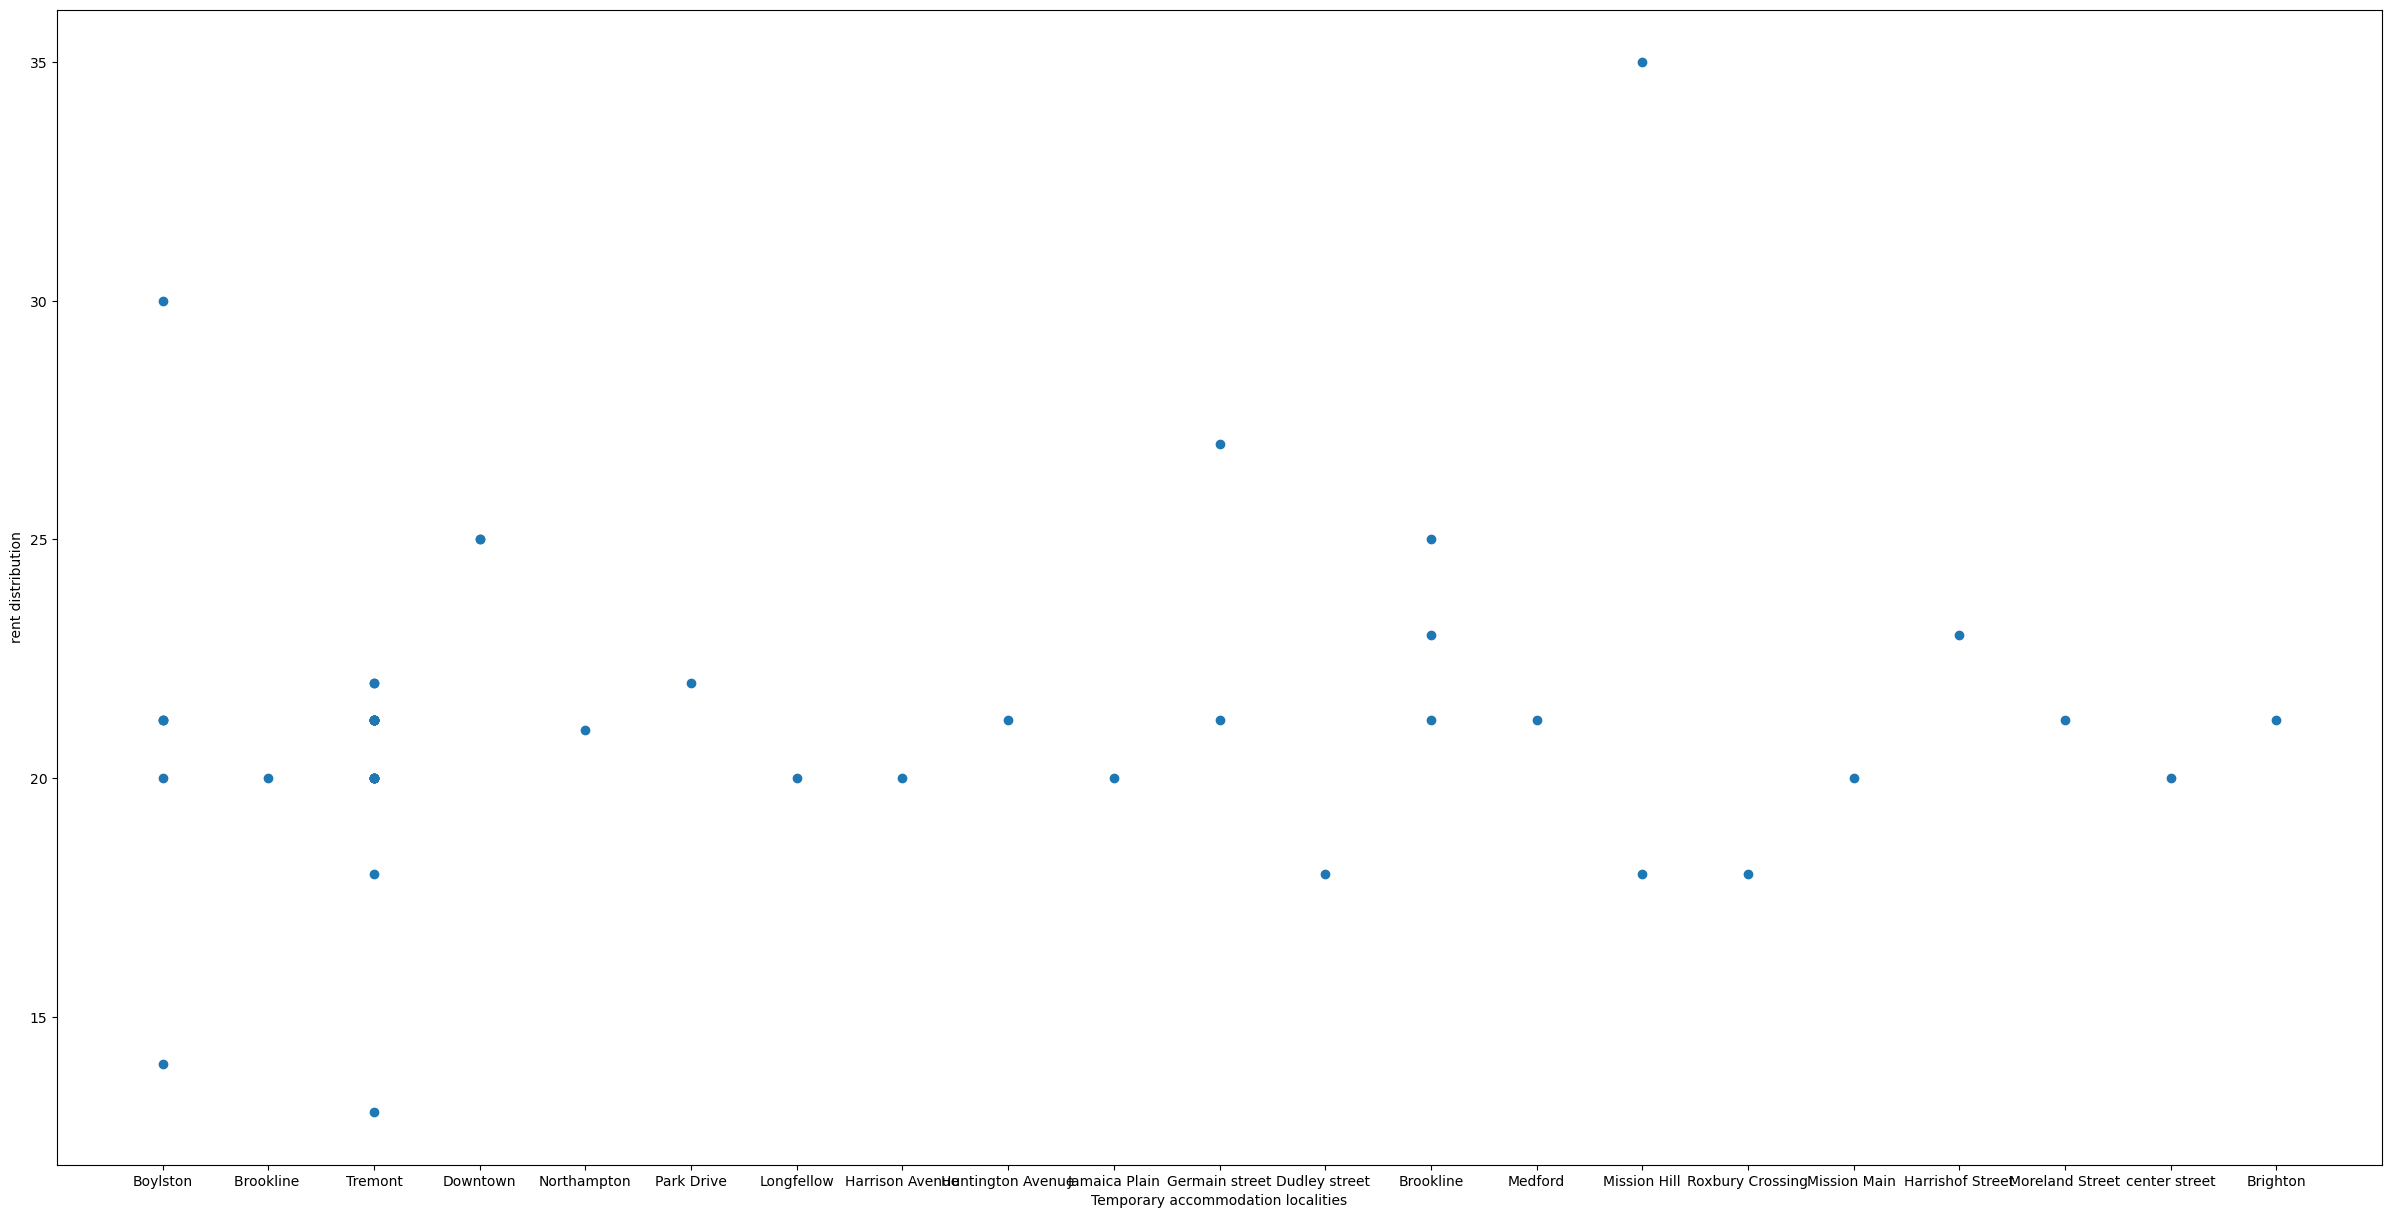

In [206]:
import matplotlib.pyplot as plt

# Make a line plot: year on the x-axis, pop on the y-axis

topLocalities = tadf['locality'].value_counts()[:5].sort_values(ascending=False)
plt.rcParams["figure.figsize"] = [30, 15]
plt.scatter(tadf['locality'],tadf['rent'])


plt.xlabel("Temporary accommodation localities")
plt.ylabel("rent distribution")

# Display the plot with plt.show()

plt.show()

In [207]:
temporaryAccommodationPostedusers = tadf.loc[:,['name', 'number']]
temporaryAccommodationPostedusers = temporaryAccommodationPostedusers.rename(columns={"number": "contact"})
print(display(HTML(temporaryAccommodationPostedusers.to_html())))

None


In [208]:
permanentAccommodationUsers = padf.loc[:,['name', 'contact']]
print(display(HTML(permanentAccommodationUsers.to_html())))

None


In [209]:
allusers = pd.concat([permanentAccommodationUsers,temporaryAccommodationPostedusers])

In [210]:
allusers

name      contact
0           Neha  16172384663
1         Shikha  16092556159
2        Akilesh  18573951538
3      Manaswini  18573816342
4   Ketan Chugni  18573767895
..           ...          ...
46   Aditi Reddy   9402991591
47        Girish  18573701801
48          Rupa   8574923818
49      Niranjan   6179554772
50    SUBHASHREE   3109854728

[111 rows x 2 columns]

In [211]:
allusers.drop_duplicates(subset='contact',inplace=True, keep='first')

allusers.reset_index(drop=True, inplace=True)

allusers

name      contact
0            Neha  16172384663
1          Shikha  16092556159
2         Akilesh  18573951538
3       Manaswini  18573816342
4    Ketan Chugni  18573767895
..            ...          ...
97    Aditi Reddy   9402991591
98         Girish  18573701801
99           Rupa   8574923818
100      Niranjan   6179554772
101    SUBHASHREE   3109854728

[102 rows x 2 columns]

In [212]:
from sqlalchemy import create_engine, MetaData, Table, delete, insert
import pymysql

user = 'root'
password = 'nageshsairam1234'
host = '127.0.0.1'
port = 3306
database = 'accommodationDB'

engine = create_engine(url="mysql+pymysql://{0}:{1}@{2}:{3}/{4}".format(user, password, host, port, database))

connection = engine.connect()
metadata = MetaData()
users = Table('user', metadata, autoload=True, autoload_with=engine)
permanentaccommodationTable = Table('permanentaccommodation', metadata, autoload=True, autoload_with=engine)

delete_stmt = delete(users)
connection.execute(delete_stmt)
# allusers.to_sql(con=engine, name='user', index=True, if_exists='replace')



In [213]:
padf.to_sql(con=engine, name='permanentaccommodation', index=True, if_exists='replace')

60

In [214]:
delete_stmt = delete(users)
connection.execute(delete_stmt)
allusers['name'].fillna(value='', inplace=True)
# for index, row in allusers.iterrows():
#     insert_stmt = insert(users).values(userid = index, name = row['name'], contact = row['contact'])
#     results = connection.execute(insert_stmt)

In [215]:
# tadf.to_sql(con=engine, name='temporaryaccommodation', index=True, if_exists='replace')

tadf['vacancy'].replace('', 0 , inplace=True)
tadf['vacancy'].fillna(0 , inplace=True)

temporaryaccommodationTable = Table('temporaryaccommodation', metadata, autoload=True, autoload_with=engine)

connection.execute(delete(temporaryaccommodationTable))

# for index, row in tadf.iterrows():
#     insert_stmt = insert(temporaryaccommodationTable).values(address= row['address'], locality = row['locality'],rent = row['rent'], start= row['start'],end =row['end'], gender=row['gender'], name= row['name'], number= row['number'], vacancy=row['vacancy'], spot= row['spot'], description=row['description'])
#     results = connection.execute(insert_stmt)
    

In [216]:
padf.fillna('', inplace= True)
padf['vacancy'].replace('', 0 , inplace=True)
padf['bath'].replace('', 1 , inplace=True)
padf['bed'].replace('', 1 , inplace=True)

permanentaccommodationTable = Table('permanentaccommodation', metadata, autoload=True, autoload_with=engine)

connection.execute(delete(permanentaccommodationTable))

# for index, row in padf.iterrows():
#     insert_stmt = insert(permanentaccommodationTable).values(address= row['address'],  location = row['location'], rent = row['rent'], roomtype= row['roomtype'], gender=row['gender'], vacancy=row['vacancy'], bed= row['bed'],bath=row['bath'], apartment_type = row['apartment_type'],  start = row['start'], end = row['end'], spot= row['spot'], name= row['name'], contact= row['contact'], description=row['description'])
#     results = connection.execute(insert_stmt)
